<h1>Experimenting with the redshift astropy function</h1>

In [1]:
from __future__ import print_function

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline
# constants for all plots
x_label = '$\lambda$($\mu$)'
y_label = 'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$'
plot_axis = [0.8, 2.4, 2.8e-15, 4.e-15]

# read data
data = np.genfromtxt("data/example_spec_ipac.txt")
wave = data[:,0]
flux = data[:,1]

In [2]:
# get reference wavelength
wave_mean = np.mean(wave)

# redshift value
z = 0.5

# build redshifted wavelength array
from astropy.modeling import models
wave_r = models.RedshiftScaleFactor(z)(wave)

# get units in which data is expressed
from astropy import units as u
wave_units = u.micron
flux_units = u.erg/u.cm**2/u.s/u.AA
photnu = u.photon/u.cm**2/u.s/u.Hz

# apply relativistic correction to flux array (accounts for time of arrival and bin stretching)
a = (flux * flux_units).to(photnu, equivalencies=u.spectral_density(wave_mean * wave_units)) 
flux_r = a.to(flux_units, equivalencies=u.spectral_density(models.RedshiftScaleFactor(z)(wave_mean) * wave_units)) 

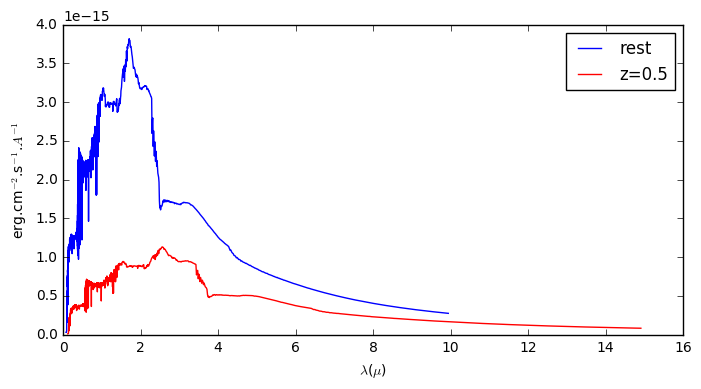

In [3]:
plt.gcf().set_size_inches(8.,4.)
plt.plot(wave, flux, color='b', label='rest')
plt.plot(wave_r, flux_r, color='r', label='z='+str(z))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

Data: total flux = 2.9997e-05
z=0.50: total flux = 2.9997e-05


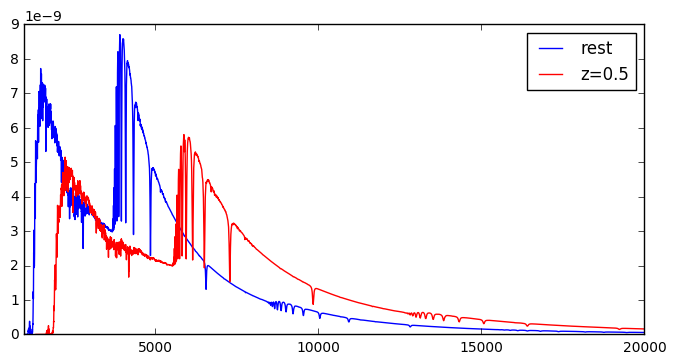

In [4]:
# use pysynphot to independently verify that 
# flux correction used above indeed conserves 
# the total flux.

import pysynphot as S
plt.gcf().set_size_inches(8.,4.)

vega = S.Vega
delta = vega.wave[1:] - vega.wave[:-1]
sum_f = np.sum(vega.flux[1:] * delta)
print("Data: total flux = %g" % sum_f)
plt.plot(vega.wave, vega.flux, label='rest')
plt.xlim(1000, 20000)

# Vega spectrum is expressed in flam units. We convert to 
# photnu units so flux density becomes invariant under 
# redshift transformations. Then we convert back to original
# flam units. 
z = 0.5
vega = S.Vega
vega.convert('photnu') 
vega = vega.redshift(z)
vega.convert('flam') 
delta = vega.wave[1:] - vega.wave[:-1]
sum_f = np.sum(vega.flux[1:] * delta)
print("z=%4.2f: total flux = %g" % (z, sum_f))
plt.plot(vega.wave, vega.flux, color='r', label='z='+str(z))
plt.xlim(1000, 20000)
plt.legend()